In [27]:
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sktime
from sktime.forecasting.naive import NaiveForecaster
from biosppy.signals import ecg
from sklearn.model_selection import train_test_split
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [5]:
X_train = pd.read_csv("X_train.csv").drop(columns=["id"])
X_test = pd.read_csv("X_test.csv").drop(columns=["id"])
labels = pd.read_csv("y_train.csv").drop(columns='id')
Y_train = labels.to_numpy()
Y_train = Y_train.reshape(-1)

In [8]:
pat0 = X_train.loc[0].dropna().to_numpy(dtype='float32')

In [15]:
info = ecg.ecg(pat0, sampling_rate =300, show=False)
cleaned = info['filtered']

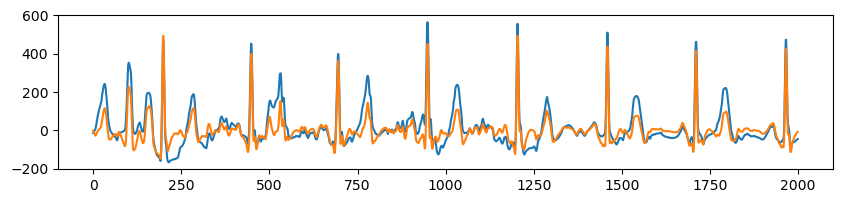

In [17]:
plt.figure(figsize=(10,2))
plt.plot(range(2000), pat0[0:2000])
plt.plot(range(2000), cleaned[0:2000])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

TypeError: X is not of a supported input data type.X must be in a supported mtype format for Panel, found <class 'pandas.core.frame.DataFrame'>Use datatypes.check_is_mtype to check conformance with specifications.